# Problem 2 (K-means clustering)
### In this problem, you will perform K-means clustering manually, with 𝐾 = 2, on a small example with 𝑛 = 6 observations and 𝑝 = 2 features. The data matrix is 𝑋.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X = np.array([[1, 4],
              [1, 3],
              [0, 4],
              [5, 1],
              [6, 2],
              [4, 0]])

### (a) Plot the observations

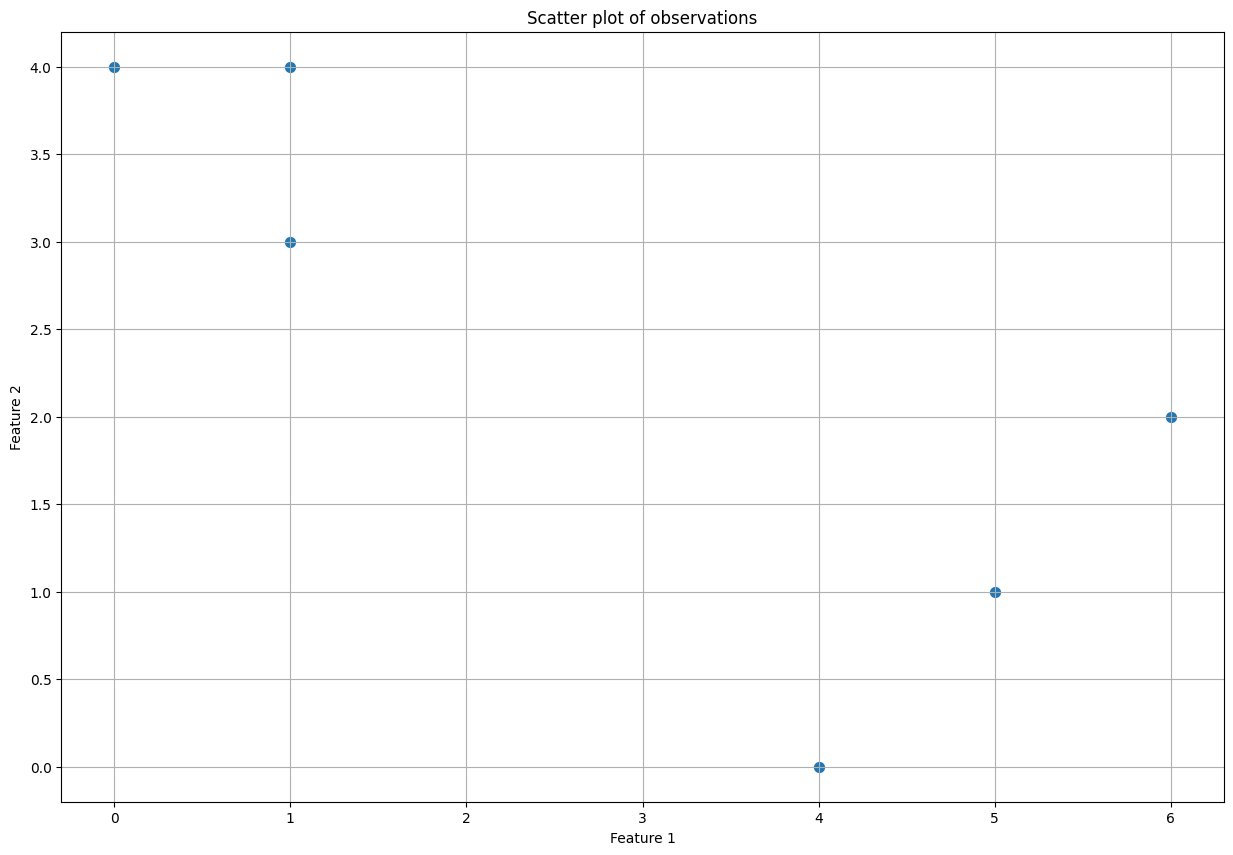

In [23]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Scatter plot of observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

### (b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [24]:
np.random.seed(42) 
cluster_labels = np.random.choice([0, 1], size=len(X))

for i, label in enumerate(cluster_labels):
    print(f'Observation {i+1}: Cluster {label}')

Observation 1: Cluster 0
Observation 2: Cluster 1
Observation 3: Cluster 0
Observation 4: Cluster 0
Observation 5: Cluster 0
Observation 6: Cluster 1


### (c) Compute the centroid for each cluster.

In [25]:
centroids = np.array([X[cluster_labels == k].mean(axis=0) for k in range(2)])
print(centroids)

[[3.   2.75]
 [2.5  1.5 ]]


### (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [26]:
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


In [27]:
cluster_labels = assign_clusters(X, centroids)

# Report the new cluster labels for each observation
for i, label in enumerate(cluster_labels):
    print(f'Observation {i+1}: Cluster {label}')

Observation 1: Cluster 0
Observation 2: Cluster 0
Observation 3: Cluster 0
Observation 4: Cluster 1
Observation 5: Cluster 0
Observation 6: Cluster 1


### (e) Repeat (c) and (d) until the answers obtained stop changing.

In [28]:
previous_labels = cluster_labels.copy()

while True:
    # Step (c): Compute the centroid for each cluster
    centroids = np.array([X[cluster_labels == k].mean(axis=0) for k in range(2)])
    
    # Step (d): Assign each observation to the centroid to which it is closest
    cluster_labels = assign_clusters(X, centroids)
    
    # Check if the cluster labels have changed
    if np.array_equal(cluster_labels, previous_labels):
        break
    
    previous_labels = cluster_labels.copy()

# Report the final cluster labels for each observation
for i, label in enumerate(cluster_labels):
    print(f'Observation {i+1}: Cluster {label}')



Observation 1: Cluster 0
Observation 2: Cluster 0
Observation 3: Cluster 0
Observation 4: Cluster 1
Observation 5: Cluster 1
Observation 6: Cluster 1


### (f) In your plot from (a), color the observations according to the cluster labels obtained.

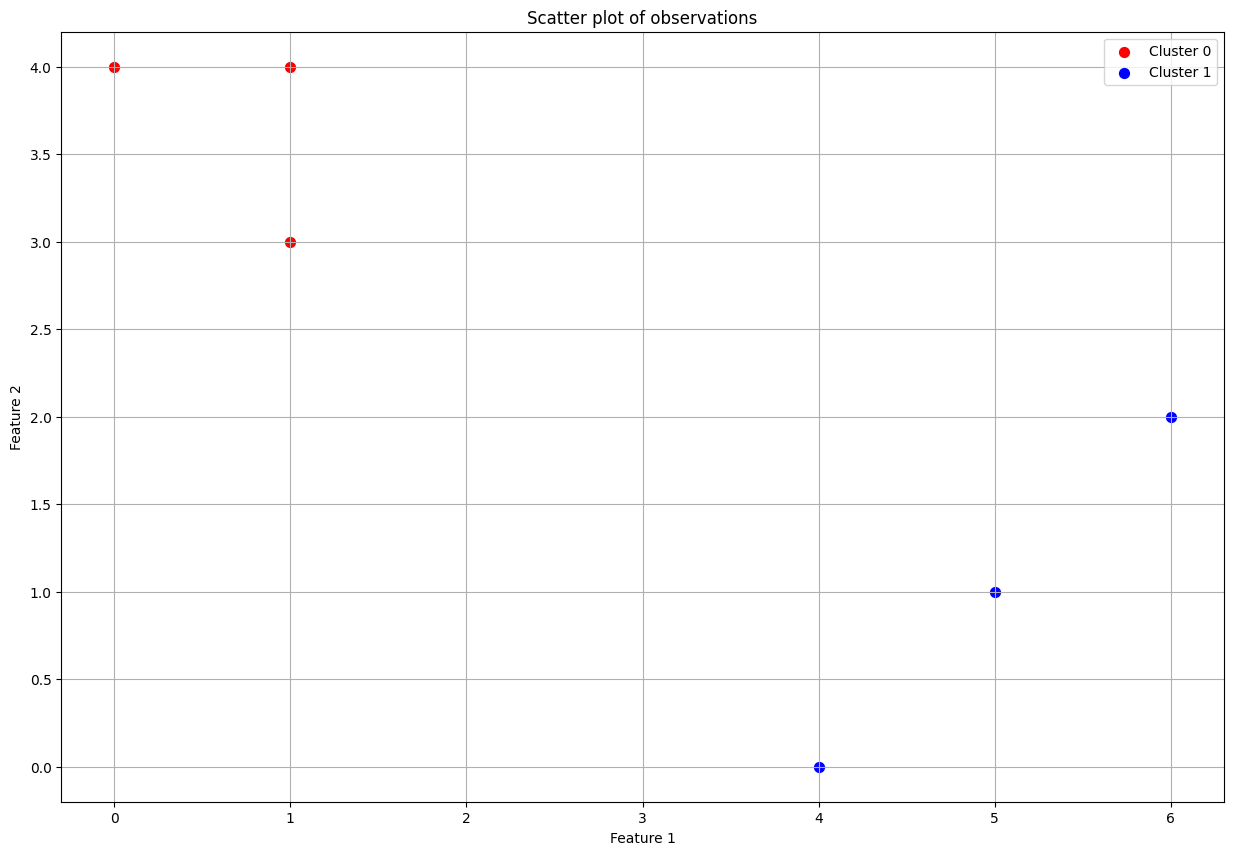

In [31]:
# Create a dictionary to map cluster labels to colors
color_map = {0: 'red', 1: 'blue'}

# Plot the scatter plot with colored clusters
plt.figure(figsize=(15, 10))
for label in np.unique(cluster_labels):
    plt.scatter(X[cluster_labels == label, 0], X[cluster_labels == label, 1], c=color_map[label], s=50, label=f'Cluster {label}')
plt.title('Scatter plot of observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()


# Problem 3 (PCA on Olivetti faces)
### Use the Olivetti faces dataset available through sklearn to do the following

In [36]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### (a) Fetch and load the data with the fetch_olivetti_faces method from sklearn.datasets.

In [40]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.datasets import fetch_olivetti_faces

# Download the Olivetti Faces dataset using HTTP mirror
faces_data = fetch_olivetti_faces(data_home="http://mldata.org/repository/data/download/scikit-learn/mldata/olivetti_faces/")

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to http://mldata.org/repository/data/download/scikit-learn/mldata/olivetti_faces/


In [68]:
print(faces_data.keys())
print(faces_data.images.shape)
faces = faces_data.images

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)


### (b) Demean each face in the data set (no need to divide by standard deviation as every dimension is a number between a fixed range representing a pixel).

In [69]:
mean_face = np.mean(faces, axis=0)
demeaned_faces = faces - mean_face
demeaned_faces

array([[[-0.09021699, -0.06646687, -0.05892554, ..., -0.04178724,
         -0.04796463, -0.03973147],
        [-0.06338856, -0.04019657, -0.04936978, ..., -0.04878098,
         -0.04523766, -0.03546485],
        [-0.06976238, -0.03759289, -0.04479337, ..., -0.04818171,
         -0.05058855, -0.05429742],
        ...,
        [-0.12650844, -0.14750019, -0.13241754, ..., -0.15982455,
         -0.14591947, -0.12916331],
        [-0.15146694, -0.15204553, -0.15314044, ..., -0.16605364,
         -0.15049602, -0.14380169],
        [-0.15798563, -0.16017535, -0.16858456, ..., -0.1685228 ,
         -0.15248989, -0.15342984]],

       [[ 0.05441111,  0.03683892,  0.0361158 , ..., -0.22360542,
         -0.19259273, -0.15956618],
        [ 0.03991723,  0.03831583,  0.03327486, ..., -0.20580578,
         -0.17333685, -0.13877065],
        [ 0.08313018,  0.06158066,  0.03785127, ..., -0.22586766,
         -0.18281996, -0.14520651],
        ...,
        [ 0.43134278,  0.42687997,  0.4378304 , ..., -

### (c) Compute and display the first 9 eigenfaces. The 𝑘-th eigenface of a given face is an image based on the first 𝑘 principal components only.

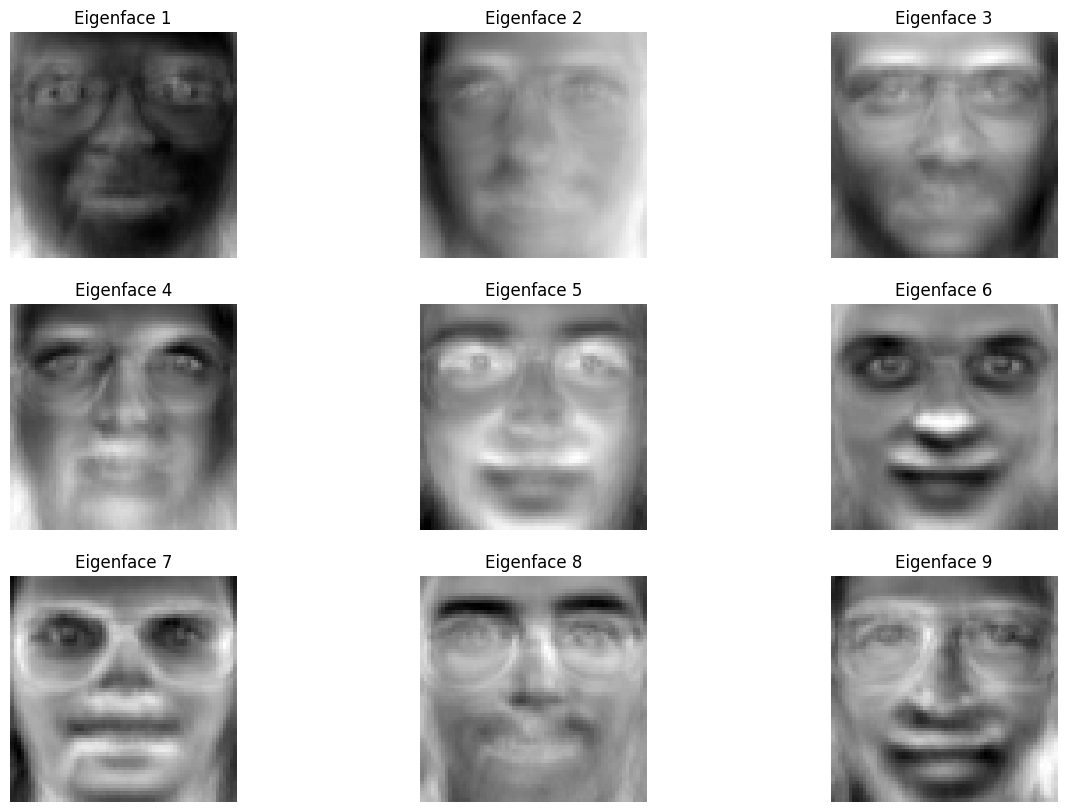

In [70]:
# Create an instance of PCA
pca = PCA()

# Reshape demeaned_faces to have 2 dimensions
demeaned_faces_2d = demeaned_faces.reshape(demeaned_faces.shape[0], -1)

# Fit PCA on demeaned_faces_2d
pca.fit(demeaned_faces_2d)

# Get the first 9 eigenfaces
eigenfaces = pca.components_[:9]

n_components = 9
pca = PCA(n_components=n_components)
pca.fit(demeaned_faces.reshape(demeaned_faces.shape[0], -1))

# Display the first 9 eigenfaces
plt.figure(figsize=(15, 10))
for i, eigenface in enumerate(eigenfaces):
    plt.subplot(3, 3, i+1)
    plt.imshow(eigenface.reshape(faces_data.images.shape[1:]), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.show()


### (d) Any given face in the data set can be represented as a linear combination of the eigenfaces. For any face in the data set, show how it progresses as we combine 1, 51, 101, … eigenfaces, until the full image is recovered.

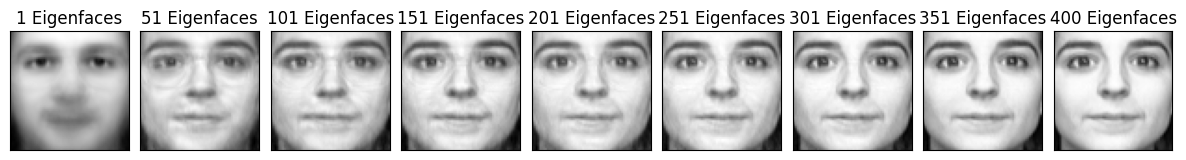

In [75]:
face_idx = 99  # Pick a face in the dataset
face = demeaned_faces[face_idx].reshape(1, -1)
faces = faces_data.images

components_to_show = [1,51,101,151,201,251,301,351,400] # Number of eigenfaces to use for reconstruction
#components_to_show = list(range(1, 401, 50)) # Number of eigenfaces to use for reconstruction
reconstructed_faces = []

for n in components_to_show:
    pca_n = PCA(n_components=n)
    pca_n.fit(demeaned_faces.reshape(demeaned_faces.shape[0], -1))
    eigenfaces_n = pca_n.components_
    
    # Project the face onto the first n eigenfaces and then reconstruct it
    face_transformed = pca_n.transform(face)
    face_reconstructed = pca_n.inverse_transform(face_transformed)
    
    # Add the mean face back to reconstruct the original image scale
    face_reconstructed_image = face_reconstructed.reshape(faces.shape[1], faces.shape[2]) + mean_face
    reconstructed_faces.append(face_reconstructed_image)

# Display the progression of the reconstructed face
fig, axes = plt.subplots(1, len(components_to_show), figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.set_title(f"{components_to_show[i]} Eigenfaces")
    ax.imshow(reconstructed_faces[i], cmap='gray')

plt.show()